# Project
The objective of this project is to design a fin. A fin is an extended surface attached to a primary surface to enhance heat transfer between that surface and the surrounding fluid. By increasing the surface area available for convection, fins allow more heat to be removed from the object for a given temperature difference. They are commonly used in heat sinks, engine cylinders, and electronic cooling devices to improve cooling efficiency without increasing overall size or weight significantly.

Consider the fin shown below which has a constant cross-sectional area (figure below). The fin is used to enhance heat removal from an electronic device whose surface temperature is not to exceed $T_b=423\,\rm{K}$. The radius of the fin is $R=D/2$ and its length along $x$ axis is $L$. The ambient temperature is $T_{\infty}=300\,\rm{K}$ and the mean convective heat transfer coefficient is $h=120\,\rm{W/(m^{2}K)}$. The thermal conductivity of the fin is $k=205\,\rm{W/(m K)}$.

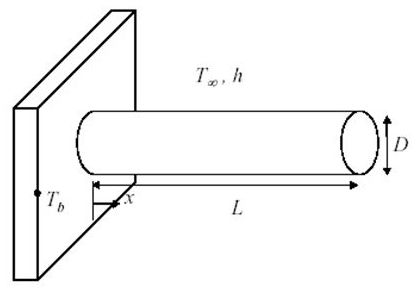

The equation governing heat conduction within the fin assuming steady state condition is
\begin{equation}
\frac{d^{2}T}{d x^{2}}=\frac{hP}{kA}(T-T_{\infty})\ \hspace{10em} (1)
\end{equation}
where $A=\pi R^{2}$ and $P=2\pi R$ are the cross-section area and perimeter, respectively. The two boundary conditions are
\begin{align*}
T=T_{b}\ &\rm{at}&\ x=0 \\
-kA\frac{dT}{dx}= hA(T-T_{\infty})\ &\rm{at}&\ x=L
\end{align*}

# Questions

1. Defining the parameter $m_L=\sqrt{hPL^{2}/kA}$, it can be shown that the normalized heat removal from the fin can be expressed as $Q^*=(m_L)^{-1/3}\tanh(m_L)$. Using this equation, find the $m_L$ value which results in the maximum heat removal from the fin. Using this optimum $m_L$ value, find the radius and length of the fin using $R^{3}=\frac{2ha^{2}}{k(m_L)^{2}}$ and $L=a/R$ where the constant $a=5\times 10^{-4}$. Report the optimum $m_L$ along with $R$ and $L$. **These $R$ and $L$ values are to be used for the rest of the project.** (Note that  may be larger the maximum value of  data (0.095m) provided in table below.)



In [6]:
# Answer 1
import numpy as np
from scipy import optimize

epsilon = 1e-6
h = 120 # W/m^2-K
k = 205 # W/mK
Tb = 423 # K
Tamb = 300 # K
a = 5e-4

Q = lambda mL: -((mL)**(-1/3))*np.tanh(mL)

Q_max = optimize.minimize_scalar(Q, bounds=(0,10))

mL = Q_max.x
R = ((2*h*a**2)/(k*mL**2))**(1/3)
L = a/R

A = np.pi*R**2
P = 2*np.pi*R

print(f"mL\t=\t{mL}")
print(f"R\t=\t{R}")
print(f"L\t=\t{L}")


mL	=	1.419222380722907
R	=	0.0052573331146500805
L	=	0.09510525376577345


2. The analytical (exact) solution for temperature along the fin is presented as data points in the table below.
\begin{align*}
&x\,\rm{[m]}  &&\qquad 0.0  &&\qquad 0.010  &&\qquad 0.025  &&\qquad 0.032  &&\qquad 0.044  &&\qquad 0.050  &&\qquad 0.061  &&\qquad 0.073  &&\qquad 0.081  &&\qquad 0.095 \\
&T\,\rm{[K]}  &&\qquad 423.00 &&\qquad 407.84 &&\qquad 389.52 &&\qquad 382.56 &&\qquad 372.69 &&\qquad 368.65 &&\qquad 362.64 &&\qquad 358.02 &&\qquad 355.98 &&\qquad 354.32 \\
\end{align*}

Find
* a spline interpolating curve passing through the data.
* a polynomial curve fit that can represent the data with sufficient accuracy.

Plot the polynomial along with the spline curve and the data on the same graph and compare. Plot the relative true error of the polynomial. The error tolerance for the polynomial is 0.01\%. Report the polynomial order, the polynomial coefficients and the coefficient of determination ($R^2$) of the polynomial fit.


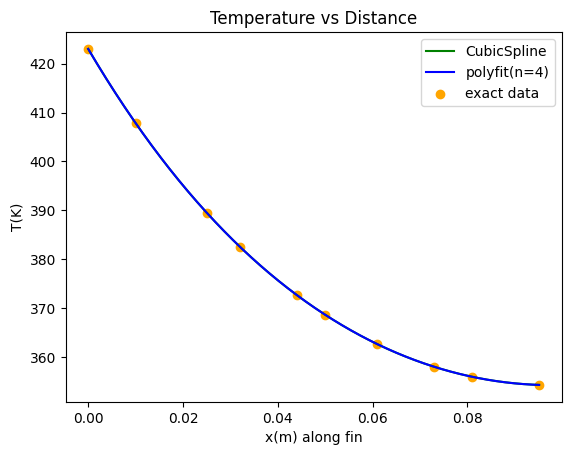

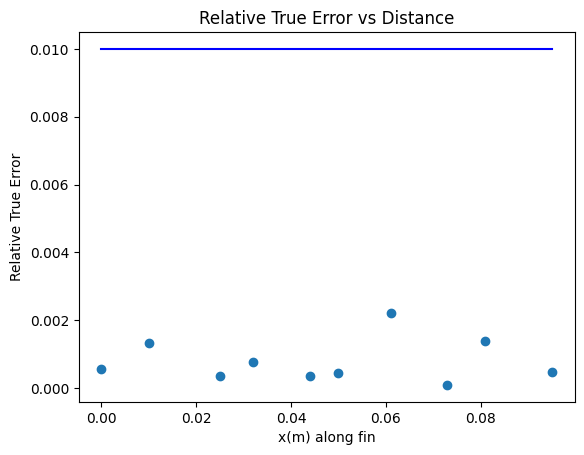

To have the relative true error remain below 0.01% we must use an n=4th order polynomial.
The coefficients are: [149898.91900244 -54003.59607578  13481.55777766  -1644.79042876
    422.99761593]
The coefficient of determination is 0.9999999711445571


In [25]:
# Answer 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from sklearn.metrics import r2_score

N = 200 # number of samples for linspace plotting
n = 4   # order of polynomial

x_data = np.array([0.0,0.010,0.025,0.032,0.044,0.050,0.061,0.073,0.081,0.095])
T_data = np.array([423,407.84,389.52,382.56,372.69,368.65,362.64,358.02,355.98,354.32])
x_linspace = np.linspace(np.min(x_data), L, N)

spline_fit = CubicSpline(x_data, T_data)
coefficients = np.polyfit(x_data, T_data, n)
poly_fit = np.poly1d(coefficients)

plt.plot(x_linspace, spline_fit(x_linspace), color='green', label='CubicSpline')
plt.plot(x_linspace, poly_fit(x_linspace), color='blue', label=f'polyfit(n={n})')
plt.scatter(x_data, T_data, color='orange', label='exact data')
plt.title("Temperature vs Distance")
plt.xlabel('x(m) along fin')
plt.ylabel('T(K)')
plt.legend()
plt.show()

absolute_error = np.abs(T_data - poly_fit(x_data))
relative_error = absolute_error / T_data * 100 # relative error in percent

plt.scatter(x_data, relative_error, label='true_relative_error')
plt.plot(x_linspace, [0.01]*len(x_linspace), color='blue', label='error_tolerance')
plt.title("Relative True Error vs Distance")
plt.ylabel("Relative True Error")
plt.xlabel("x(m) along fin")
plt.show()

print(f"To have the relative true error remain below 0.01% we must use an n={n}th order polynomial.")
print(f"The coefficients are: {coefficients}")

r2 = r2_score(T_data, poly_fit(x_data))

print(f"The coefficient of determination is {r2}")




3. Find an interpolating polynomial representing the data. Plot the polynomial along with the data on the same graph and compare. The polynomial order must be appropriate for the data—linear interpolation is not acceptable. Report the polynomial order, the polynomial coefficients. Find the intermediate temperature value (in $K$) at  $x=0.038\,\rm{[m]}$ using the interpolating polynomial.

In [8]:
# Answer 3
print("Using the interpolated polynomial from Q2: ")
print(f"T(0.038)=\t{poly_fit(0.038)}")

Using the interpolated polynomial from Q2: 
T(0.038)=	377.3122233812472


4. Obtain temperature along the fin from the spline curve and use a finite-difference approximation with second order accuracy at all points (including the first and the last points) to find the heat flux along the fin using $Q(x)=-kA \frac{dT}{dx}$. Compare this heat flux with that calculated using derivative provided directly by the spline function. Plot the heat flux along the fin using both methods on the same graph and compare. Report the heat flux value from the finite-difference method at $x=L$.


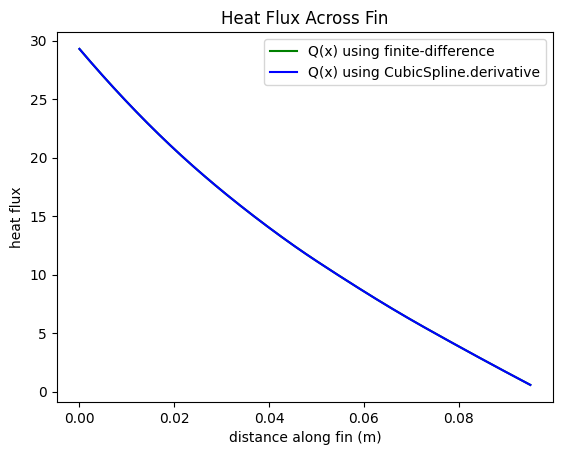

heat_flux(x=L)=	0.5757473677453954


In [22]:
# Answer 4
delta = 0.00001
# we are using spline fit here
T_prime_approx = lambda x: (spline_fit(x+delta) - spline_fit(x-delta))/(2*delta)
T_prime_exact = spline_fit.derivative(1)

Q_approx = lambda x: -k*A*T_prime_approx(x)
Q_exact = lambda x: -k*A*T_prime_exact(x)

plt.title("Heat Flux Across Fin")
plt.xlabel("distance along fin (m)")
plt.ylabel("heat flux")
plt.plot(x_linspace, Q_approx(x_linspace), color='green', label='Q(x) using finite-difference')
plt.plot(x_linspace, Q_exact(x_linspace), color='blue', label='Q(x) using CubicSpline.derivative')
plt.legend()
plt.show()

print(f"heat_flux(x=L)=\t{Q_approx(L)}")

5. Perform numerical integration to verify that $\frac{1}{kA}\int_{0}^{L} Q dx \approx T_{b}-T_L$, where $T_L$ is the temperature at $x=L$ obtained from the spline fit. $Q$ is the heat flux along the fin found in part 4 using finite-difference method. Integrate heat flux and calculate $\frac{1}{kA}\int_{0}^{L} Q dx$. Compare this value with the true value ($T_{b}-T_L$) and calculate relative true error (%). Report $\frac{1}{kA}\int_{0}^{L} Q dx$, the true value ($T_{b}-T_L$) and relative true error (%).

In [48]:
# Answer 5
import scipy.integrate as integrate

dt_numerical = 1/(k*A) * integrate.quad(Q_exact, 0, L)[0]
dt_actual = max(T_data) - min(T_data)

print(f"The numerical dT=\t{dt_numerical}")
print(f"The actual dT=\t\t{dt_actual}")

absolute_error = np.abs(dt_actual-dt_numerical)
relative_error = absolute_error/dt_actual

print(f"The relative true error is:\t{relative_error*100}%")

The numerical dT=	68.683472590566
The actual dT=		68.68
The relative true error is:	0.005056188942910804%


6. Use shooting method to solve the ordinary differential equation in Eq. (1). Plot the temperature along the fin together with the analytical data (from part 2) on the same graph. Report the temperature value (in $K$) and true error at $x=L$.


Shooting Method Converged with T'=-1646.9948493180143 in 4 iterations.


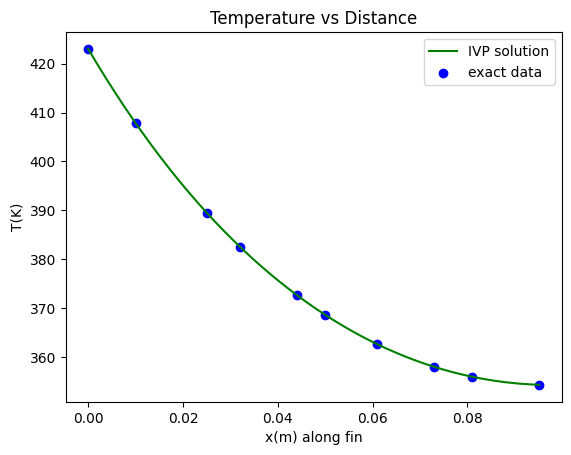

IVP Solution T(L)=	354.3490796424705
True Error =		0.00820716935834619%


In [54]:
# Answer 6
from scipy.integrate import solve_ivp
# let y1 = T(x)
# let y2 = T'(x)
# let S = [T, dT/dx, d2T/dx2] = [T, T']

def ode_system(x, T):
    return [T[1], (h*P)/(k*A) * (T[0]-Tamb)]

def integrate_ivp(s, x_eval):
    sol0 = [Tb, s]
    sol = solve_ivp(ode_system, (0,L), sol0, t_eval=x_eval)
    return sol.t, sol.y

def residual(s, x_eval):
    x, y = integrate_ivp(s, x_eval)
    T_L = y[0,-1]
    Tp_L = y[1,-1]
    return Tp_L + h/k * (T_L-Tamb)

def find_initial_s_secant(s0, s1, x_eval, step_size=1e-6, tol=1e-9, epsilon_denom=1e-16, maxit=50):
    R0 = residual(s0, x_eval)
    R1 = residual(s1, x_eval)
    for it in range(1, maxit+1):
        if abs(R1) < tol:
            return s1, True, it
        denom = (R1 - R0)
        if abs(denom) < epsilon_denom:
            s0 += step_size
            R0 = residual(s0, x_eval)
            denom = (R1 - R0)
            if abs(denom) < epsilon_denom:
                break
        s2 = s1 - R1 * (s1 - s0) / denom
        s0, R0, s1, R1 = s1, R1, s2, residual(s2, x_eval)
    return s1, (abs(R1) < tol), it

# guess s0 = -1000 and s1 = 0 since s < 0
s, converged, iterations = find_initial_s_secant(-1000, 0, x_linspace)
if (converged):
    print(f"Shooting Method Converged with T'={s} in {iterations} iterations.")
else:
    print(f"Shooting Method Failed to Converge with T'={s} in {iterations} iterations.")

solution = integrate_ivp(s, x_linspace)

plt.title("Temperature vs Distance")
plt.xlabel('x(m) along fin')
plt.ylabel('T(K)')
plt.plot(solution[0], solution[1][0], color='green', label='IVP solution')
plt.scatter(x_data, T_data, color='blue', label='exact data')
plt.legend()
plt.show()

print(f"IVP Solution T(L)=\t{solution[1][0][-1]}")

absolute_error = np.abs(T_data[-1] - solution[1][0][-1])
relative_error = absolute_error / T_data[-1]

print(f"True Error =\t\t{relative_error*100}%")

